In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import yfinance as yf

In [3]:
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    data = yf.Ticker(a)
    pf_data[a] = data.history(start = '2014-01-01')['Close']

In [4]:
pf_data

,PG,^GSPC
Date,,
2014-01-02 00:00:00-05:00,60.028873,1831.979980
2014-01-03 00:00:00-05:00,59.961796,1831.369995
2014-01-06 00:00:00-05:00,60.103394,1826.770020
2014-01-07 00:00:00-05:00,60.684776,1837.880005
2014-01-08 00:00:00-05:00,59.805256,1837.489990
...,...,...
2024-01-26 00:00:00-05:00,156.139999,4890.970215
2024-01-29 00:00:00-05:00,156.160004,4927.930176
2024-01-30 00:00:00-05:00,157.490005,4924.970215


In [5]:
pf_data.tail()

,PG,^GSPC
Date,,
2024-01-26 00:00:00-05:00,156.139999,4890.970215
2024-01-29 00:00:00-05:00,156.160004,4927.930176
2024-01-30 00:00:00-05:00,157.490005,4924.970215
2024-01-31 00:00:00-05:00,157.139999,4845.649902
2024-02-01 00:00:00-05:00,159.179993,4906.189941


<Axes: xlabel='Date'>

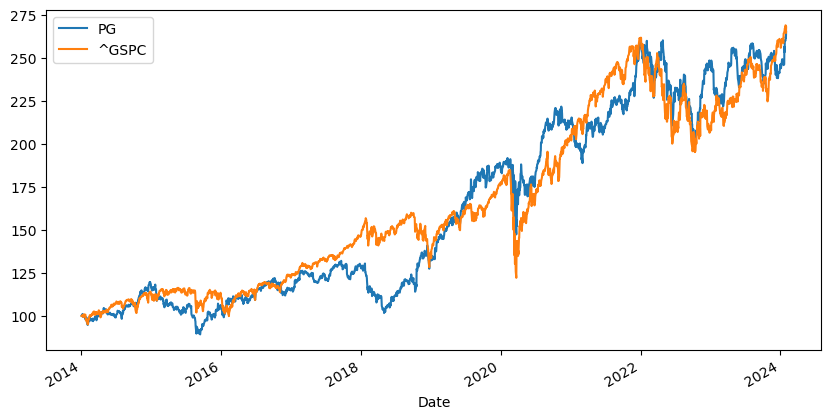

In [6]:
(pf_data/ pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [7]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [8]:
log_returns.mean()*250

PG       0.096099
^GSPC    0.097073
dtype: float64

In [9]:
log_returns.cov()*250

,PG,^GSPC
PG,0.032933,0.017848
^GSPC,0.017848,0.031270


In [10]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.556164
^GSPC,0.556164,1.000000


In [11]:
num_assets = len(assets)
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([0.76340472, 0.65874865])

In [13]:
arr[0] + arr[1]

1.422153365034799

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.26170651, 0.73829349])

In [15]:
Portfolio_returns = np.sum(weights * log_returns.mean()) * 250 # Expected Portfolio Return

In [16]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.026197050942191533

In [17]:
 portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))) # Porfolio Volatility(risk)

In [18]:
pfolio_returns = []
pfolio_volatility = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(Portfolio_returns)
    pfolio_volatility.append(portfolio_volatility)
    
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatility = np.array(pfolio_volatility)
    

In [19]:
pfolio_returns,pfolio_volatility

(array([0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09681828, 0.09681828,
        0.09681828, 0.09681828, 0.09681828, 0.09

In [20]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatility})

In [21]:
portfolios.head()

,Return,Volatility
0,0.096818,0.161855
1,0.096818,0.161855
2,0.096818,0.161855
3,0.096818,0.161855
4,0.096818,0.161855


In [24]:
portfolios.tail()

,Return,Volatility
995,0.096818,0.161855
996,0.096818,0.161855
997,0.096818,0.161855
998,0.096818,0.161855
999,0.096818,0.161855


Text(0, 0.5, 'Expected Returns')

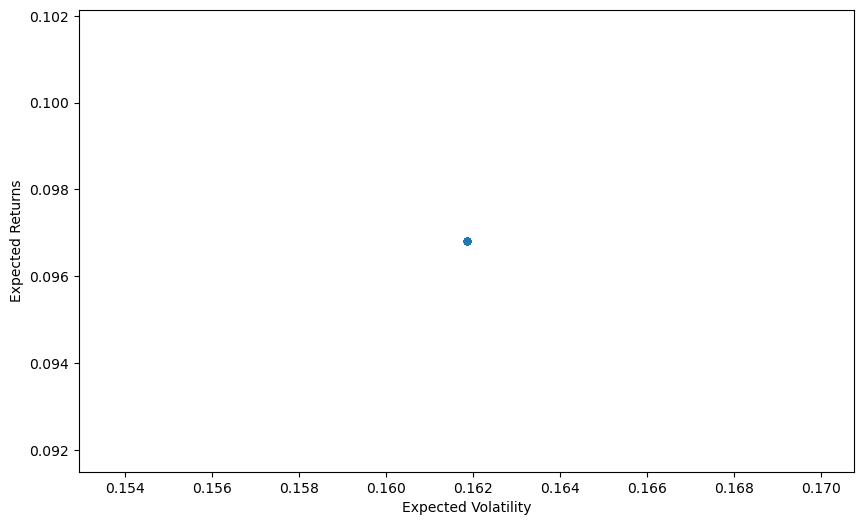

In [25]:
portfolios.plot(x = 'Volatility', y = 'Return' , kind = 'scatter' ,figsize = (10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')